In [1]:
from results.summarize_results_in_db import collect_postprocessed_results, extract_plot_data_baseline, plot_data_baseline_from_website, plot_data_baseline_postprocessed
from dcase2020.config import experiments_path, mongo_connection_string
from dcase2020.secret_config import mongo_password
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



/home/verena/miniconda3/envs/py37-dcase/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/home/verena/miniconda3/envs/py37-dcase/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [49]:
def plot(results, y_metric="rocauc", outpath=None):
    plt.figure(figsize=(12,16))
    sns.set(font_scale=1.5)
    with sns.color_palette("hls", 5):
        # g = sns.barplot(x="machine_type_id", y=y_metric, hue="label",data=results, orient='h')
        g = sns.barplot(y="machine_type_id", x=y_metric, hue="label",data=results, orient='h')

    # plt.xticks(rotation=90)
    plt.ylabel(None)
    plt.xlabel("ROC")
    plt.tight_layout()
    plt.legend(loc='upper left')
    if outpath is not None:
        plt.savefig(outpath)
    plt.show()

In [3]:
mongo_db_uri = mongo_connection_string.format(
    mongo_password)

# run_ids = [413, 378, 395, 422]
run_ids = [413, 378, 395]
print(run_ids)

[413, 378, 395]


In [4]:
db_name='dcase2020_task2_flows_grid'
plot_data_db = collect_postprocessed_results(experiments_path, db_name, run_ids, overwrite=False)

69
69


In [5]:
# baseline vs. flow
plot_data_b = extract_plot_data_baseline(mongo_db_uri, aggregate=False)
plot_data_b['machine_type_id'] = 'dev/' + plot_data_b['machine_type'] + '/test_' + plot_data_b['machine_id']
plot_data_b['run_id'] = 'Baseline (Ours)'
plot_data_b['rocauc'] = plot_data_b['rocauc'].astype('float') / 100
plot_data_b['p_rocauc'] = plot_data_b['p_rocauc'].astype('float') / 100

In [6]:
plot_data_baseline_pp = plot_data_baseline_postprocessed()
plot_data_baseline_pp['machine_type_id'] = 'dev/' + plot_data_baseline_pp['machine_type'] + '/test_' + plot_data_baseline_pp['machine_id']
plot_data_baseline_pp['run_id'] = 'Haunschmid_CPJKU_task2_1'
plot_data_baseline_pp['rocauc'] = plot_data_baseline_pp['rocauc'].astype('float') / 100

In [7]:
plot_data_b_online = plot_data_baseline_from_website()
plot_data_b_online['machine_type_id'] = 'dev/' + plot_data_b_online['machine_type'] + '/test_' + plot_data_b_online['machine_id']
plot_data_b_online['run_id'] = 'Baseline Website'
plot_data_b_online['rocauc'] = plot_data_b_online['rocauc'].astype('float') / 100

In [21]:
results = pd.DataFrame()

In [22]:
results = results.append(plot_data_b_online)
# results = results.append(plot_data_b)
results = results.append(plot_data_baseline_pp)
results = results.append(plot_data_db)

results['label'] = results['run_id']
results.loc[results['run_id']==413,'label'] = 'Haunschmid_CPJKU_task2_2'
results.loc[results['run_id']==378,'label'] = 'Haunschmid_CPJKU_task2_3'
results.loc[results['run_id']==395,'label'] = 'Haunschmid_CPJKU_task2_4'

In [23]:
results

,machine_type,machine_id,rocauc,ID,Class,machine_type_id,run_id,machine,metric,p_rocauc,label
0,ToyCar,id_01,0.813600,ToyCar id_01,Baseline Website,dev/ToyCar/test_id_01,Baseline Website,NaN,NaN,NaN,Baseline Website
1,ToyCar,id_02,0.859700,ToyCar id_02,Baseline Website,dev/ToyCar/test_id_02,Baseline Website,NaN,NaN,NaN,Baseline Website
2,ToyCar,id_03,0.623000,ToyCar id_03,Baseline Website,dev/ToyCar/test_id_03,Baseline Website,NaN,NaN,NaN,Baseline Website
3,ToyCar,id_04,0.844500,ToyCar id_04,Baseline Website,dev/ToyCar/test_id_04,Baseline Website,NaN,NaN,NaN,Baseline Website
4,ToyConveyor,id_01,0.780700,ToyConveyor id_01,Baseline Website,dev/ToyConveyor/test_id_01,Baseline Website,NaN,NaN,NaN,Baseline Website
...,...,...,...,...,...,...,...,...,...,...,...
0,dev/slider/test,id_06,0.988202,NaN,NaN,dev/slider/test_id_06,395,dev/slider/test_id_06_2020-06-10 21:55:46.0159...,std,0.974571,Haunschmid_CPJKU_task2_4
0,dev/valve/test,id_00,0.887731,NaN,NaN,dev/valve/test_id_00,395,dev/valve/test_id_00_2020-06-10 21:56:43.99576...,std,0.598850,Haunschmid_CPJKU_task2_4
0,dev/valve/test,id_02,0.994333,NaN,NaN,dev/valve/test_id_02,395,dev/valve/test_id_02_2020-06-10 21:57:47.85630...,std,0.970175,Haunschmid_CPJKU_task2_4
0,dev/valve/test,id_04,0.975500,NaN,NaN,dev/valve/test_id_04,395,dev/valve/test_id_04_2020-06-10 21:58:54.24598...,std,0.895614,Haunschmid_CPJKU_task2_4


In [53]:
results['machine_type_id'] = [m.replace("dev/", "") for m in results['machine_type_id']]
results['machine_type_id'] = [m.replace("/test_id", "") for m in results['machine_type_id']]

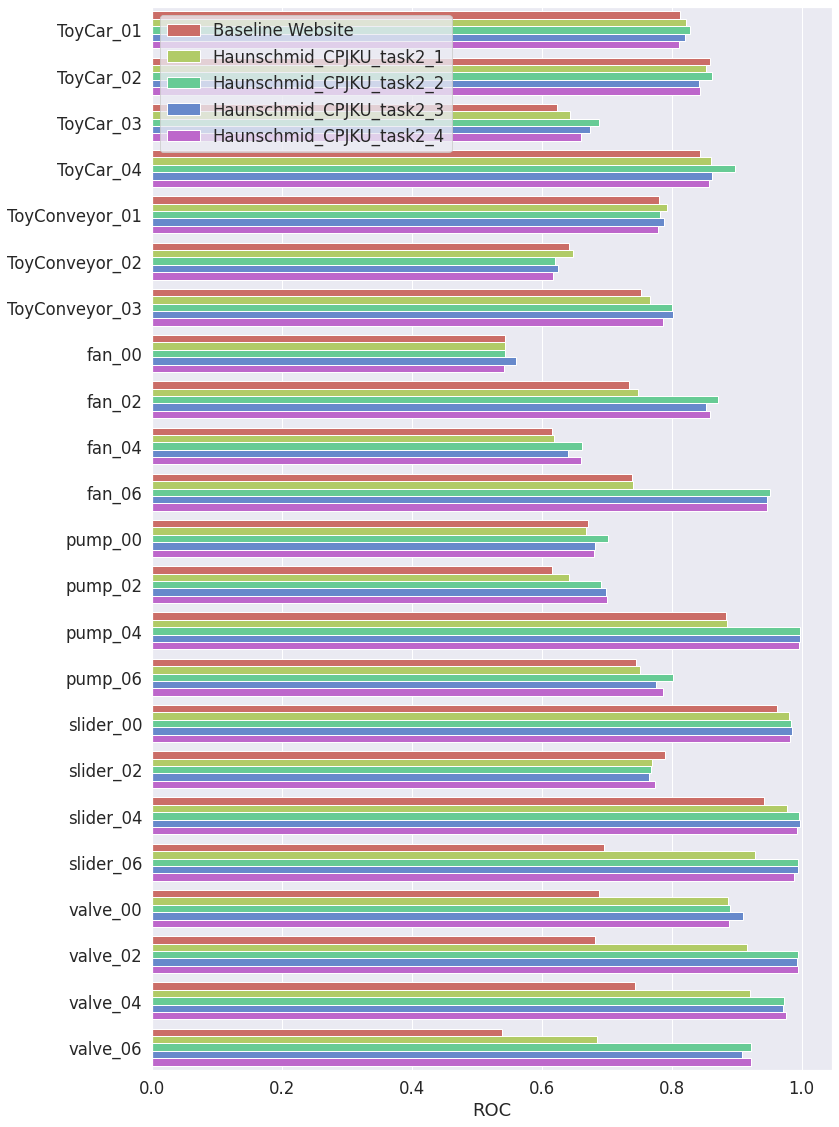

In [54]:
plot(results, outpath='/home/verena/experiments/dcase2020/top4.png')

In [ ]:
plot(results, "p_rocauc", outpath='/home/verena/experiments/dcase2020/top4_proc.png')
